### Train a Perceptron
Perceptron is a fundamental building block for neural networks. Let us try to
train a single perceptron. Consider the data given in the following table. As one
can see, it has two attributes x1,x2 and a class label (either 0 or 1).
1. Implement the perceptron training rule and get the appropriate parameters for
a single perceptron.
2. Plot the data points and the obtained decision boundary.
3. Also draw the schematic diagram of the trained perceptron with learned
weights. You can draw this on paper and attach a photo.

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv('data.csv')
data.head()

,x1,x2,Class
0,2,3,0
1,4,5,0
2,11,11,1
3,4,11,1
4,12,5,0


In [21]:
data.dtypes

x1       int64
x2       int64
Class    int64
dtype: object

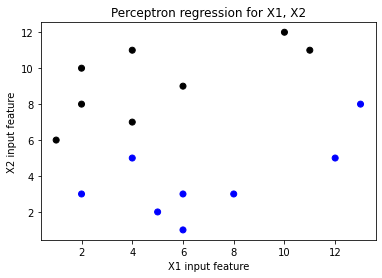

In [31]:
# Get data and plot the points
X = data.iloc[:, :2].values
y = data.iloc[:, -1].values

x1 = X[:, 0]
x2 = X[:, 1]
color = ['black' if value == 1 else 'blue' for value in y]
plt.scatter(x1, x2, marker='o', color=color)
plt.xlabel('X1 input feature')
plt.ylabel('X2 input feature')
plt.title('Perceptron regression for X1, X2')
plt.show()

In [32]:
clf = Perceptron().fit(X, y)

In [40]:
clf.score(X, y)

0.8125

In [51]:
b = clf.intercept_[0]
w1, w2 = clf.coef_.T
print (w1,w2)

[-20.] [20.]


Text(0.5, 1.0, 'Perceptron')

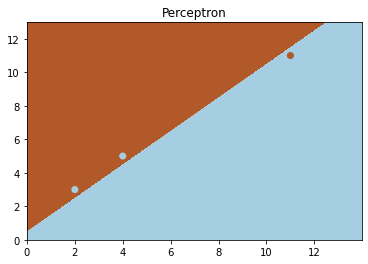

In [48]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig, ax = plt.subplots()
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
ax.axis()


# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

ax.set_title('Perceptron')

In [52]:
# Photo attached with this notebook for schematic diagram

### Train a Neural Network
Let us design a neural network to classify flowers from Iris dataset (Link for Iris dataset: ​ https://archive.ics.uci.edu/ml/datasets/iris)
1. Implement a single hidden layer MLP. Final output layer will have 3 neurons,
one for each result. Arch: [Input, hidden, output]
2. Now use an NN with two hidden layers. The first hidden layer has 9 neurons.
The second hidden layer has 3 neurons. Arch: [Input,hidden1,hidden2,output]

(i) Use keras to design the NN model and train on the iris data.

(ii) Draw the schematic diagram of the NN 2 along with all the weights and
specify suitable activation function. How many trainable parameters are there?

In [1]:
## Data load and pre-process

from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder

iris_data = load_iris() # load the iris dataset

print('Example data: ')
print(iris_data.data[:5])
print('Example labels: ')
print(iris_data.target[:5])

x = iris_data.data
y_ = iris_data.target.reshape(-1, 1) # Convert data to a single column

# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)
#print(y)


Example data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Example labels: 
[0 0 0 0 0]


In [2]:
# Split the data for training and testing
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)

In [17]:
# Build the model ( single hidden layer MLP) 

model = Sequential()

#model.add(Dense(10, input_shape=(4,), activation='relu', name='fc1'))
#model.add(Dense(9, activation='relu', name='fc2'))
model.add(Dense(3, input_shape=(4,),activation='softmax', name='output'))

# Adam optimizer with learning rate of 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())

# Train the model
model.fit(train_x, train_y, verbose=2, batch_size=2, epochs=20)

# Test on unseen data

results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Neural Network Model Summary: 
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
output (Dense)               (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
60/60 - 0s - loss: 7.0652 - accuracy: 0.3417
Epoch 2/20
60/60 - 0s - loss: 6.0258 - accuracy: 0.3417
Epoch 3/20
60/60 - 0s - loss: 4.9883 - accuracy: 0.3417
Epoch 4/20
60/60 - 0s - loss: 3.9598 - accuracy: 0.3417
Epoch 5/20
60/60 - 0s - loss: 2.9900 - accuracy: 0.3417
Epoch 6/20
60/60 - 0s - loss: 2.1720 - accuracy: 0.3417
Epoch 7/20
60/60 - 0s - loss: 1.6166 - accuracy: 0.3500
Epoch 8/20
60/60 - 0s - loss: 1.2714 - accuracy: 0.3750
Epoch 9/20
60/60 - 0s - loss: 1.0511 - accuracy: 0.4083
Epoch 10/20
60/60 - 0s - loss: 0.9341 - accuracy: 0.4500
Epoch 11/20
60/60 - 0s - loss: 0.8766 - accuracy: 0.583

In [18]:

# Build the model with two hidden layers. 

model = Sequential()

model.add(Dense(9, input_shape=(4,), activation='relu', name='fc1'))
model.add(Dense(3, activation='softmax', name='output'))

# Adam optimizer with learning rate of 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())

# Train the model
model.fit(train_x, train_y, verbose=2, batch_size=2, epochs=20)

# Test on unseen data

results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Neural Network Model Summary: 
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 9)                 45        
_________________________________________________________________
output (Dense)               (None, 3)                 30        
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
60/60 - 0s - loss: 3.5875 - accuracy: 0.3417
Epoch 2/20
60/60 - 0s - loss: 1.8518 - accuracy: 0.3250
Epoch 3/20
60/60 - 0s - loss: 1.4119 - accuracy: 0.1167
Epoch 4/20
60/60 - 0s - loss: 1.2050 - accuracy: 0.2500
Epoch 5/20
60/60 - 0s - loss: 1.0405 - accuracy: 0.5250
Epoch 6/20
60/60 - 0s - loss: 0.9287 - accuracy: 0.5417
Epoch 7/20
60/60 - 0s - loss: 0.8486 - accuracy: 0.5917
Epoch 8/20
60/60 - 0s - loss: 0.7901 - accuracy: 0.5583
Epoch 9/20
60/60 - 0s - loss: 0.7230

In [19]:
weights = model.get_weights()
for i in range(len(weights)):
    print(weights[i].shape)

(4, 9)
(9,)
(9, 3)
(3,)


In [20]:
len(model.get_weights())

4

In [24]:
print(model.get_weights()[0])

[[ 0.11598071  0.6308341   0.6033052  -0.5056364  -0.27139378  0.45608965
   0.18231457  0.28815153  0.6479473 ]
 [-0.00286548  0.12554075  0.0157338   0.4472836  -0.08942884  0.48967797
  -0.05398593  0.53298604  0.52246153]
 [ 0.5236013  -0.01691722 -0.15636756  0.3624686  -0.44249535 -0.57502955
   0.44103804 -0.61099064 -0.11059084]
 [ 0.80624676 -0.02275073  0.4349526  -0.10543579  0.41687107 -0.2260049
   0.04648969  0.15572752 -0.68894017]]


In [28]:
print(model.get_weights()[1])

[-0.15574995 -0.09200142 -0.16061817 -0.05680266  0.          0.19653307
 -0.0588697   0.02614018  0.19273503]


In [26]:
print(model.get_weights()[2])

[[-0.5075126   0.22708473  0.0979103 ]
 [-0.3232685  -0.24628437  0.59007823]
 [-0.39355066  0.0098973   0.5403588 ]
 [ 0.06526388  0.15242624 -0.316979  ]
 [ 0.44222027 -0.24354658  0.18516141]
 [ 0.66493696 -0.1146087  -0.43957543]
 [-0.09499843  0.6183616  -0.09033401]
 [-0.17274274  0.39562413 -1.1555326 ]
 [ 0.82465506 -0.02871133 -0.2290144 ]]


In [29]:
    print(model.get_weights()[3])

[ 0.18319473 -0.08031658 -0.05731972]
